In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train_data_dir = '/content/drive/MyDrive/archive/train'
test_data_dir = '/content/drive/MyDrive/archive/test'


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 557 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [10]:
model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=25,
    validation_data=test_set,
    validation_steps=len(test_set)
)


Epoch 1/25
18/18 [==============================] - 155s 8s/step - loss: 0.7135 - accuracy: 0.4722 - val_loss: 0.6929 - val_accuracy: 0.5333
Epoch 2/25
18/18 [==============================] - 8s 461ms/step - loss: 0.6896 - accuracy: 0.5296 - val_loss: 0.6892 - val_accuracy: 0.5267
Epoch 3/25
18/18 [==============================] - 6s 356ms/step - loss: 0.6863 - accuracy: 0.5512 - val_loss: 0.6828 - val_accuracy: 0.5333
Epoch 4/25
18/18 [==============================] - 8s 419ms/step - loss: 0.6766 - accuracy: 0.5907 - val_loss: 0.7560 - val_accuracy: 0.4667
Epoch 5/25
18/18 [==============================] - 7s 370ms/step - loss: 0.6661 - accuracy: 0.5996 - val_loss: 0.6760 - val_accuracy: 0.5867
Epoch 6/25
18/18 [==============================] - 6s 363ms/step - loss: 0.6473 - accuracy: 0.6122 - val_loss: 0.6906 - val_accuracy: 0.6000
Epoch 7/25
18/18 [==============================] - 7s 377ms/step - loss: 0.6435 - accuracy: 0.6517 - val_loss: 0.6821 - val_accuracy: 0.6400
Epoch 8

In [11]:
score = model.evaluate(test_set)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


5/5 [==============================] - 1s 242ms/step - loss: 0.7802 - accuracy: 0.6267
Test loss: 0.7802271842956543
Test accuracy: 0.6266666650772095


In [12]:
score = model.evaluate(test_set)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


5/5 [==============================] - 1s 232ms/step - loss: 0.7802 - accuracy: 0.6267
Test loss: 0.7802273035049438
Test accuracy: 0.6266666650772095


In [13]:
model.save('/content/drive/MyDrive/cat_dog_classifier.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model):
    test_image = image.load_img(img_path, target_size=(64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    test_image = test_image / 255.0  # Normalisasi
    result = model.predict(test_image)
    if result[0][0] >= 0.5:
        prediction = 'dog'
    else:
        prediction = 'cat'
    return prediction


In [18]:
from tensorflow.keras.models import load_model

# Muat model jika disimpan
model = load_model('/content/drive/MyDrive/cat_dog_classifier.h5')


In [17]:
import matplotlib.pyplot as plt

def show_prediction(img_path, model):
    img = image.load_img(img_path, target_size=(64, 64))
    plt.imshow(img)
    plt.axis('off')
    prediction = predict_image(img_path, model)
    plt.title(f'Predicted: {prediction}')
    plt.show()



1/1 [==============================] - 0s 17ms/step


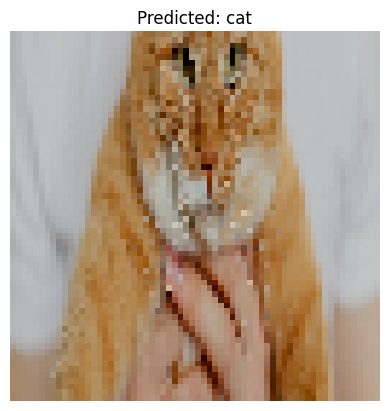

1/1 [==============================] - 0s 17ms/step


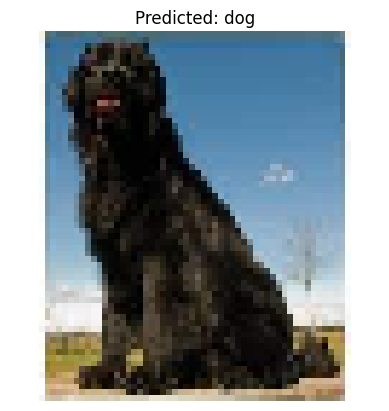

In [38]:
import matplotlib.pyplot as plt

def show_prediction(img_path, model):
    img = image.load_img(img_path, target_size=(64, 64))
    plt.imshow(img)
    plt.axis('off')
    prediction = predict_image(img_path, model)
    plt.title(f'Predicted: {prediction}')
    plt.show()

# Uji dan tampilkan beberapa gambar
for img_path in test_images:
    show_prediction(img_path, model)


In [27]:
score = model.evaluate(test_set)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


5/5 [==============================] - 1s 215ms/step - loss: 0.7802 - accuracy: 0.6267
Test loss: 0.7802272439002991
Test accuracy: 0.6266666650772095


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Mendapatkan prediksi dan label sebenarnya
Y_pred = model.predict(test_set)
y_pred = np.where(Y_pred > 0.5, 1, 0)

# Label sebenarnya
y_true = test_set.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix')
print(cm)

# Classification Report
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=['cat', 'dog']))


5/5 [==============================] - 1s 229ms/step
Confusion Matrix
[[43 27]
 [45 35]]
Classification Report
              precision    recall  f1-score   support

         cat       0.49      0.61      0.54        70
         dog       0.56      0.44      0.49        80

    accuracy                           0.52       150
   macro avg       0.53      0.53      0.52       150
weighted avg       0.53      0.52      0.52       150



In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2]
)

training_set = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 557 images belonging to 2 classes.


In [30]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Membekukan layer pretrained
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


58889256/58889256 [==============================] - 0s 0us/step


In [31]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [32]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/best_model.h5', save_best_only=True)

model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=50,
    validation_data=test_set,
    validation_steps=len(test_set),
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/50
18/18 [==============================] - 10s 368ms/step - loss: 0.6984 - accuracy: 0.5081 - val_loss: 0.6920 - val_accuracy: 0.5333
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 8s 441ms/step - loss: 0.6926 - accuracy: 0.4937 - val_loss: 0.6883 - val_accuracy: 0.5333
Epoch 3/50
18/18 [==============================] - 7s 403ms/step - loss: 0.6912 - accuracy: 0.5476 - val_loss: 0.6854 - val_accuracy: 0.5733
Epoch 4/50
18/18 [==============================] - 7s 427ms/step - loss: 0.6881 - accuracy: 0.5763 - val_loss: 0.6820 - val_accuracy: 0.6133
Epoch 5/50
18/18 [==============================] - 8s 471ms/step - loss: 0.6724 - accuracy: 0.6014 - val_loss: 0.7093 - val_accuracy: 0.5333
Epoch 6/50
18/18 [==============================] - 7s 381ms/step - loss: 0.6871 - accuracy: 0.5422 - val_loss: 0.7106 - val_accuracy: 0.5533
Epoch 7/50
18/18 [==============================] - 8s 442ms/step - loss: 0.6629 - accuracy: 0.6176 - val_loss: 0.7009 - val_accuracy: 0.5733
Epoch 8/50
18/18 [==============================] - 7s 400ms/step - loss: 0.6738 - accuracy: 0.5745 - val_loss: 0.6761 - val_accuracy: 0.6467
Epoch 9/50
18/18 

In [33]:
from tensorflow.keras.models import load_model

# Muat model terbaik yang disimpan selama pelatihan
model = load_model('/content/drive/MyDrive/best_model.h5')


In [34]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model):
    test_image = image.load_img(img_path, target_size=(64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    test_image = test_image / 255.0  # Normalisasi
    result = model.predict(test_image)
    if result[0][0] >= 0.5:
        prediction = 'dog'
    else:
        prediction = 'cat'
    return prediction


In [37]:
# Daftar path gambar untuk diuji
test_images = [
    '/content/drive/MyDrive/archive/test/cats/cat_5.jpg',
    '/content/drive/MyDrive/archive/test/dogs/dog_197.jpg',
    # Tambahkan path gambar lainnya di sini
]

for img_path in test_images:
    prediction = predict_image(img_path, model)
    print(f'Image: {img_path} - Predicted class: {prediction}')


1/1 [==============================] - 0s 19ms/step
Image: /content/drive/MyDrive/archive/test/cats/cat_5.jpg - Predicted class: cat
1/1 [==============================] - 0s 18ms/step
Image: /content/drive/MyDrive/archive/test/dogs/dog_197.jpg - Predicted class: dog


1/1 [==============================] - 0s 19ms/step


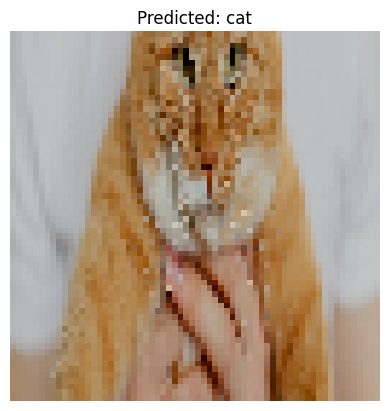

1/1 [==============================] - 0s 19ms/step


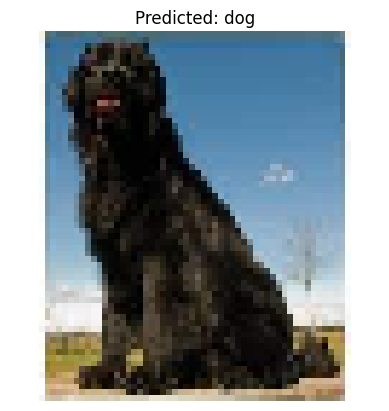

In [39]:
import matplotlib.pyplot as plt

def show_prediction(img_path, model):
    img = image.load_img(img_path, target_size=(64, 64))
    plt.imshow(img)
    plt.axis('off')
    prediction = predict_image(img_path, model)
    plt.title(f'Predicted: {prediction}')
    plt.show()

# Uji dan tampilkan beberapa gambar
for img_path in test_images:
    show_prediction(img_path, model)


1/1 [==============================] - 0s 20ms/step


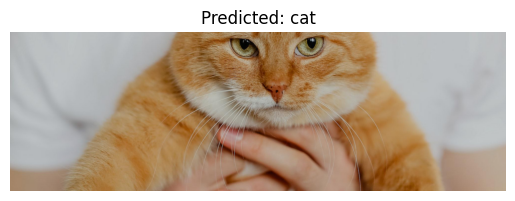

1/1 [==============================] - 0s 19ms/step


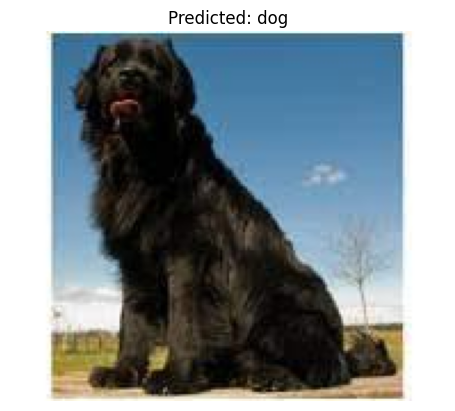

In [41]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path, model):
    # Muat dan proses gambar untuk prediksi
    test_image = image.load_img(img_path, target_size=(64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    test_image = test_image / 255.0  # Normalisasi
    result = model.predict(test_image)
    if result[0][0] >= 0.5:
        prediction = 'dog'
    else:
        prediction = 'cat'
    return prediction

def show_prediction(img_path, model):
    # Muat gambar asli untuk visualisasi
    original_image = image.load_img(img_path)
    plt.imshow(original_image)
    plt.axis('off')

    # Prediksi menggunakan gambar yang diubah ukurannya
    prediction = predict_image(img_path, model)

    # Tampilkan judul dengan prediksi
    plt.title(f'Predicted: {prediction}')
    plt.show()

# Daftar path gambar untuk diuji
test_images = [
    '/content/drive/MyDrive/archive/test/cats/cat_5.jpg',
    '/content/drive/MyDrive/archive/test/dogs/dog_197.jpg',
    # Tambahkan path gambar lainnya di sini
]

for img_path in test_images:
    show_prediction(img_path, model)
